# Book Recommendation 

## Business Objective:


In [1]:
#Generate the features from the dataset and use them to recommend the books
#accordingly to the users.
#Content
#The Book-Crossing dataset comprises 3 files.
# Users
#Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers.
#Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-
#values.
# Books
#Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the
#dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-
#Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several
#authors, only the first is provided. URLs linking to cover images are also given, appearing in three
#different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These
#URLs point to the Amazon web site.
# Ratings
#Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a
#scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
books= pd.read_csv("Books (1).csv")
rating= pd.read_csv('Ratings.csv')
users= pd.read_csv("Users.csv")

C:\Users\Deepak\AppData\Local\Temp\ipykernel_5204\578358793.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books= pd.read_csv("Books (1).csv")


In [4]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [6]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [7]:
print(books.shape)
print(rating.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
books.describe

<bound method NDFrame.describe of               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford         

In [12]:
books.duplicated().sum()

0

In [13]:
rating.duplicated().sum()

0

In [14]:
users.duplicated().sum()

0

In [15]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [16]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [17]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Text(0.5, 1.0, 'Find outlier data in Age column')

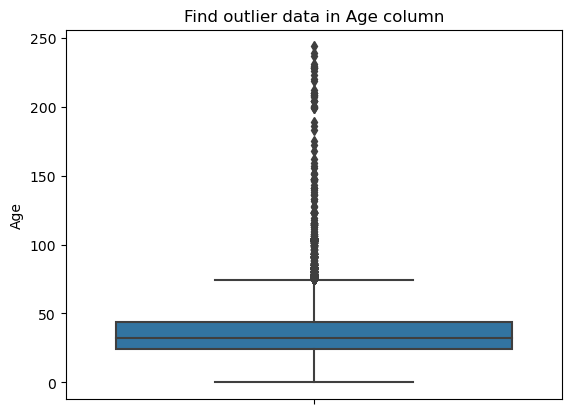

In [18]:
sns.boxplot(y='Age',data= users)
plt.title('Find outlier data in Age column')

C:\Users\Deepak\AppData\Local\Temp\ipykernel_5204\2845807502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age)


Text(0.5, 1.0, 'Age Distribution Plot')

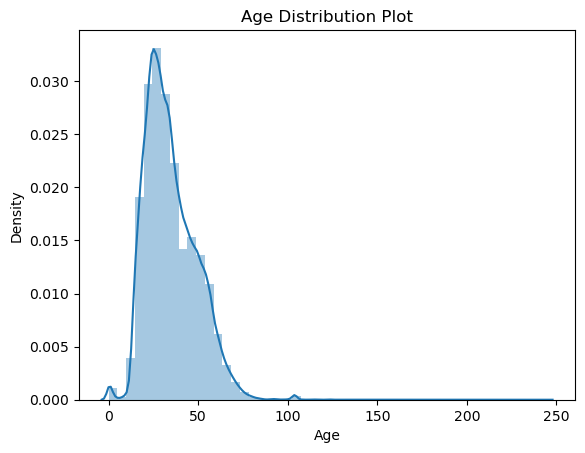

In [19]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

In [20]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [21]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [22]:
users.drop("Location",axis=1,inplace=True)

In [23]:
users

,User-ID,Age
0,1,NaN
1,2,18.0
2,3,NaN
3,4,17.0
4,5,NaN
...,...,...
278853,278854,NaN
278854,278855,50.0
278855,278856,NaN
278856,278857,NaN


In [24]:
books["Book-Author"].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [25]:
users["Age"].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [26]:
# nan values in particular column
books.loc[(books['Book-Author'].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [27]:
books.loc[(books['Publisher'].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [28]:
books['Book-Author'].fillna('Unknown_Author',inplace=True)
books["Publisher"].fillna('Unknown_Publisher',inplace=True)

In [29]:
books["Publisher"]== "Unknown_Publisher"

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Name: Publisher, Length: 271360, dtype: bool

In [30]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [31]:
users

,User-ID,Age
0,1,34.751434
1,2,18.000000
2,3,34.751434
3,4,17.000000
4,5,34.751434
...,...,...
278853,278854,34.751434
278854,278855,50.000000
278855,278856,34.751434
278856,278857,34.751434


In [36]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [37]:
users.isnull().sum()

User-ID    0
Age        0
dtype: int64

In [38]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [39]:
new_book=rating.merge(books,on="ISBN")
new_books=new_book.merge(users,on="User-ID")

In [40]:
new_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34.751434
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.000000
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.000000
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.000000
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.000000
...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62.000000
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,34.751434
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.000000
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.000000


In [41]:
new_books['Year-Of-Publication'].unique()

array([2002, 1986, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970, 1978,
       1993, 1989, 1995, 1990, 1992, 1950, 1991, 1999, 1954, 1988, 2003,
       2004, 2000, 1983, 1985, 1982, 1956, 1979, '2003', 1975, 0, 1976,
       1981, 1977, 1980, 1974, 1957, 1958, 1960, 1963, 1969, 1972, 1961,
       1971, 1953, 1968, 1973, 1967, 1962, 1937, 1959, '1998', '1981',
       '0', '1979', '1993', '1994', '1992', '1978', '1989', '1999',
       '1987', '1988', '1995', '1991', '1996', '2000', '1976', '2001',
       '2002', '1983', '1997', '1986', '1985', 1955, 1946, '2004', 2005,
       '1971', '1984', '1980', '1982', '1990', '1957', 1945, 1965, '1950',
       1964, '1964', '1970', '1969', '1960', '1956', '1977', '1973', 1927,
       2020, '1968', 2050, '1972', '1975', '1974', 1920, 1966, 1952,
       '1965', '1963', 1930, '1962', '1952', 1940, '1967', 1942, 1947,
       1925, '1966', 1948, '1958', 1923, 2030, 1951, 2021, 1941, 1932,
       '1961', 2011, '1951', 1901, 2038, '1940', 1929, 1943, 1936

# Visualizations

Text(0.5, 1.0, 'Top 20 author with number of books')

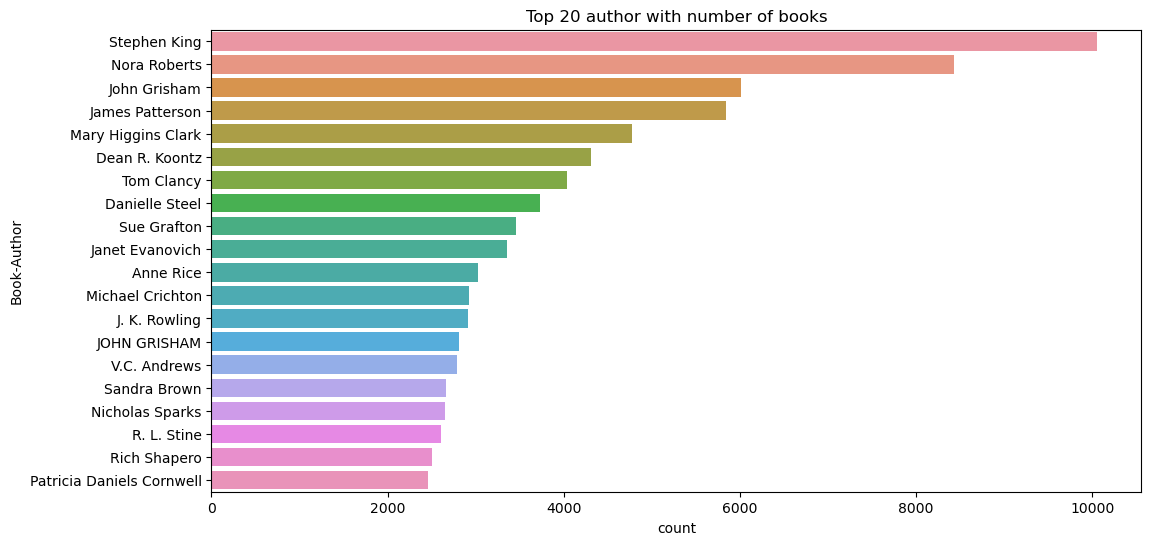

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(y='Book-Author',data=new_book,order=new_book['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

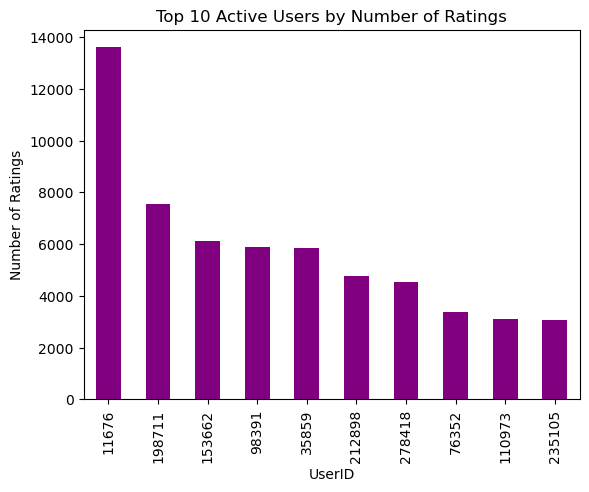

In [43]:
user_activity = rating['User-ID'].value_counts().head(10)
user_activity.plot(kind='bar', color='purple')
plt.title('Top 10 Active Users by Number of Ratings')
plt.xlabel('UserID')
plt.ylabel('Number of Ratings')
plt.show()

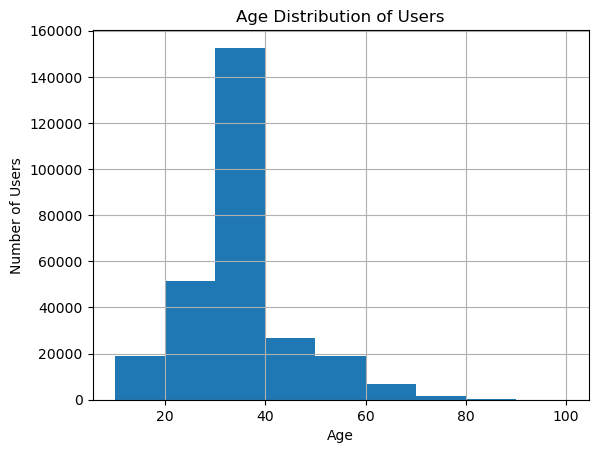

In [44]:
users['Age'].hist(bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()


Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

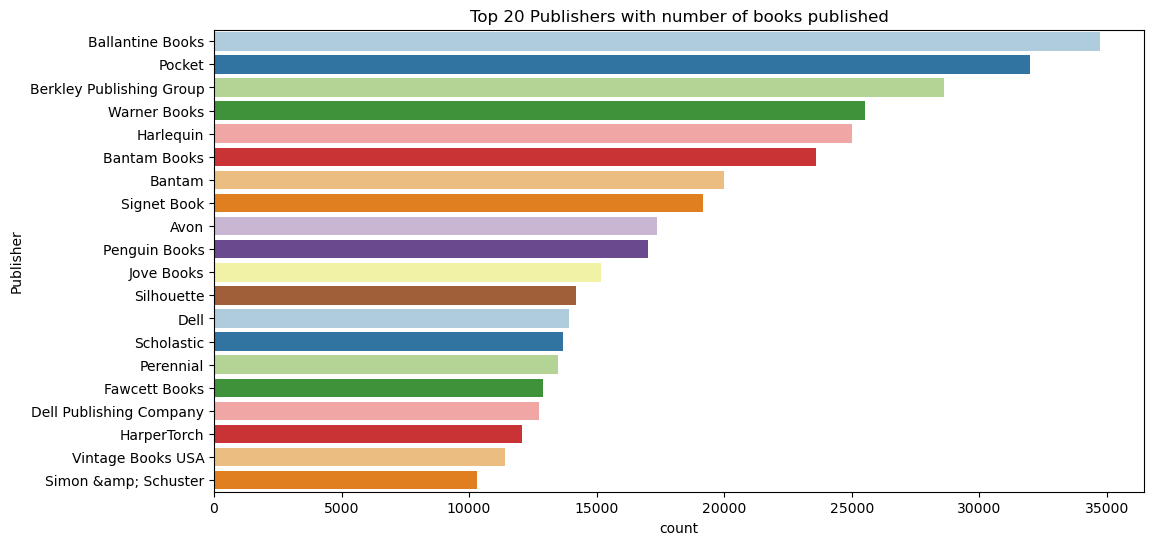

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(y="Publisher",palette = 'Paired', data=new_book,order=new_book['Publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

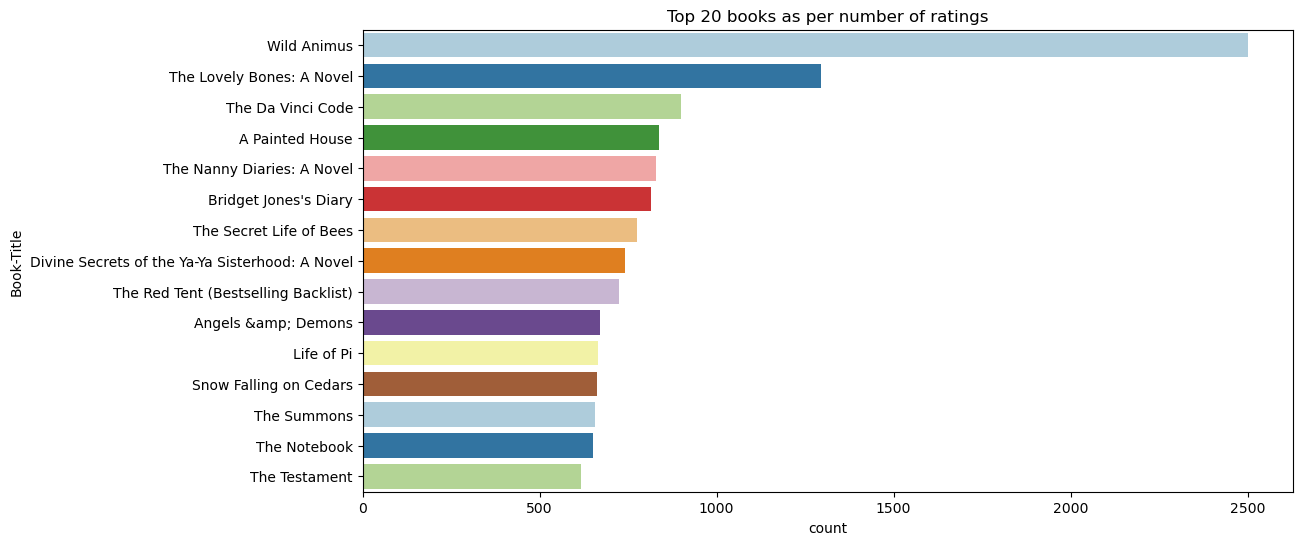

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Title",palette = 'Paired',data= new_book, order=new_book['Book-Title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

Text(0.5, 1.0, 'Find outlier data in Age column')

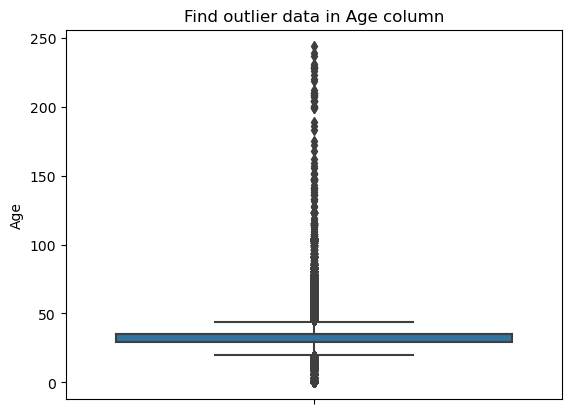

In [47]:
sns.boxplot(y='Age',data= users)
plt.title('Find outlier data in Age column')

C:\Users\Deepak\AppData\Local\Temp\ipykernel_5204\2845807502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age)


Text(0.5, 1.0, 'Age Distribution Plot')

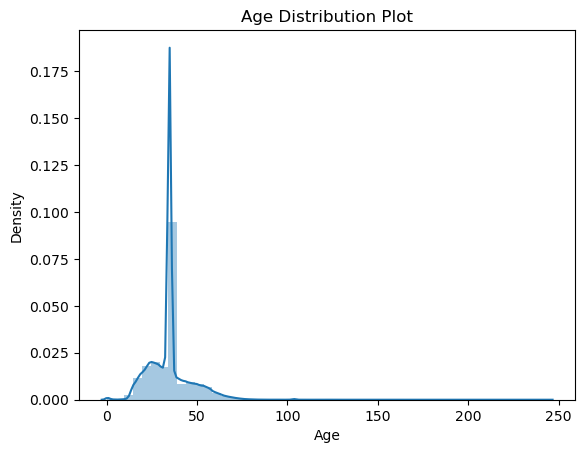

In [48]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

# Popularity Based Recommender System


In [49]:
new_book=rating.merge(books,on="ISBN")
new_books=new_book.merge(users,on="User-ID")

In [50]:
new_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34.751434
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.000000
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.000000
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.000000
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.000000
...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62.000000
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,34.751434
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.000000
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.000000


In [51]:
new_books.to_csv('books_cleaned.csv')

In [52]:
# group by the number of ratings for each book
num_rating_df = new_books.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating': 'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [53]:
avg_rating_df = new_books.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'},inplace=True)
avg_rating_df

C:\Users\Deepak\AppData\Local\Temp\ipykernel_5204\2513547048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = new_books.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [54]:
popularity_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popularity_df 

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [55]:
popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False)


,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [56]:
# Top 50 books
popularity_df = popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False).head(50)
popularity_df 

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [57]:
popularity_df = popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'num_ratings', 'avg_ratings']]
popularity_df

,Book-Title,Book-Author,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,260,4.880769
39,To Kill a Mockingbird,Harper Lee,510,4.700000


# Collaborative Filtering Based Recommendation System


In [58]:
# users who have rated more than 200 times
x = new_books.groupby('User-ID').count()['Book-Rating'] > 200
educated_users = x[x].index
educated_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [59]:
filtered_rating = new_books[new_books['User-ID'].isin(educated_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age
37,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34.0
38,6543,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",34.0
39,6543,0385504209,0,The Da Vinci Code,Dan Brown,2003,Doubleday,34.0
40,6543,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,34.0
41,6543,0312966970,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,34.0
...,...,...,...,...,...,...,...,...
892567,133868,0505522748,0,"Bold Land, Bold Love",Connie Mason,1998,Love Spell,36.0
892568,133868,0739416863,0,Suddenly You,Lisa Kleypas,2001,"Avon Books, Harper Collins",36.0
892569,133868,0739417525,8,Heartless,Kat Martin,2001,St. Martin's Press,36.0
892570,133868,0821772236,0,Shifting Calder Wind,Janet Dailey,2004,Zebra Books,36.0


In [60]:
# books which have been rated more than 50 times
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [61]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age
38,6543,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",34.0
39,6543,0385504209,0,The Da Vinci Code,Dan Brown,2003,Doubleday,34.0
40,6543,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,34.0
41,6543,0312966970,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,34.0
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,34.0
...,...,...,...,...,...,...,...,...
842419,72352,1551668874,0,Heartbreaker,Linda Howard,2002,Mira,49.0
842458,72352,0671670069,10,Guardian Angel,Julie Garwood,1990,Pocket,49.0
856993,4385,0786868716,0,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,33.0
857035,4385,0440221471,10,The Runaway Jury,JOHN GRISHAM,1997,Dell,33.0


In [62]:
# drop the duplicate values if any
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age
38,6543,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",34.0
39,6543,0385504209,0,The Da Vinci Code,Dan Brown,2003,Doubleday,34.0
40,6543,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,34.0
41,6543,0312966970,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,34.0
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,34.0
...,...,...,...,...,...,...,...,...
842419,72352,1551668874,0,Heartbreaker,Linda Howard,2002,Mira,49.0
842458,72352,0671670069,10,Guardian Angel,Julie Garwood,1990,Pocket,49.0
856993,4385,0786868716,0,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,33.0
857035,4385,0440221471,10,The Runaway Jury,JOHN GRISHAM,1997,Dell,33.0


In [63]:
# contains books which have been rated atleast 50 times and users who have rated more than 200 books
pt = final_ratings.pivot_table(index='Book-Title', columns = 'User-ID', values = 'Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [64]:
# replace NaN with 0
pt.fillna(0,inplace=True)

In [65]:
# books x columns
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
similarity_score = cosine_similarity(pt)

In [68]:
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [69]:
# sort the books which are more similar to each other
sorted(list(enumerate(similarity_score[0])), key=lambda x:x[1],reverse=True)[1:13]

[(47, 0.2702651417103732),
 (545, 0.26396193711234966),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286),
 (181, 0.22222254415660225),
 (500, 0.21057743765309012),
 (344, 0.20675540390453995),
 (554, 0.20025063706783053),
 (520, 0.19972624710300058),
 (527, 0.19656287691544358),
 (488, 0.19511819825564608)]

In [70]:
def recommend(book_name):
    # fetch index from book name
    index = np.where(pt.index == book_name)[0][0]
    #distances = similarity_score[index]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1],reverse=True)[1:13]
    
    data = []
    for i in similar_items:
        item = []
        # print(pt.index[i[0]])
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        data.append(item)
        
    return data

In [71]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)', 'J. K. Rowling'],
 ['Harry Potter and the Goblet of Fire (Book 4)', 'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)", 'J. K. Rowling'],
 ['Harry Potter and the Order of the Phoenix (Book 5)', 'J. K. Rowling'],
 ["Charlotte's Web (Trophy Newbery)", 'E. B. White'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN'],
 ['The Witness', 'Sandra Brown'],
 ['The Firm', 'John Grisham'],
 ['The Secret Garden', 'Frances Hodgson Burnett'],
 ['A Time to Kill', 'JOHN GRISHAM'],
 ["Bridget Jones's Diary", 'Helen Fielding']]